<a href="https://colab.research.google.com/github/0xPriyanshuJha/MLDump/blob/main/Plantdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
... resuming from 375390208 bytes (314122482 bytes left) ...
100% 658M/658M [00:10<00:00, 32.7MB/s]
100% 658M/658M [00:10<00:00, 29.5MB/s]


In [4]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [6]:
DATA_PATH = '../content/PlantVillage'

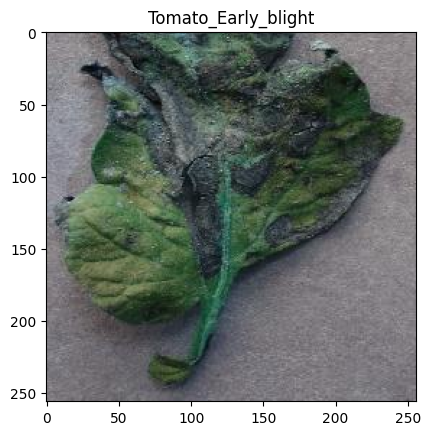

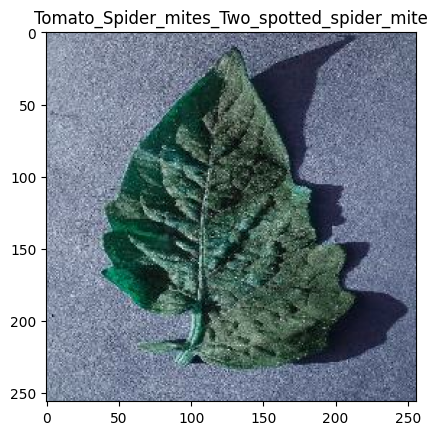

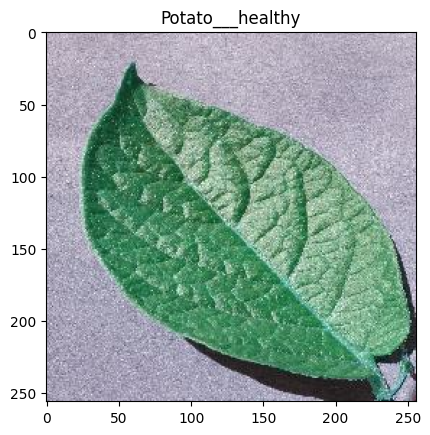

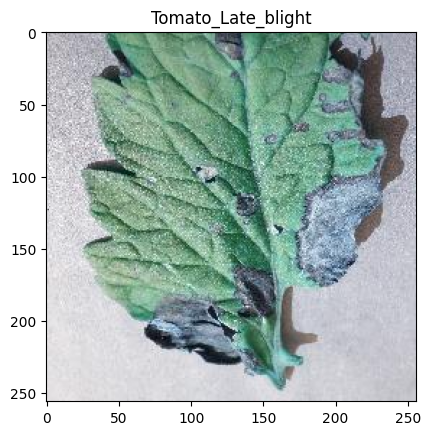

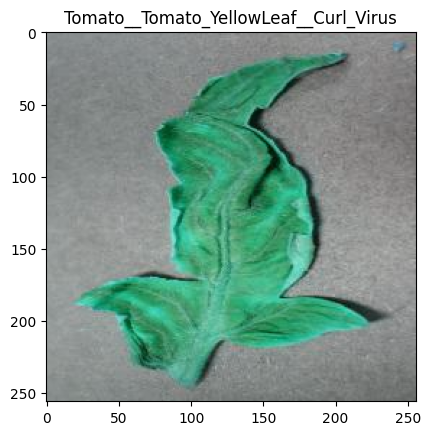

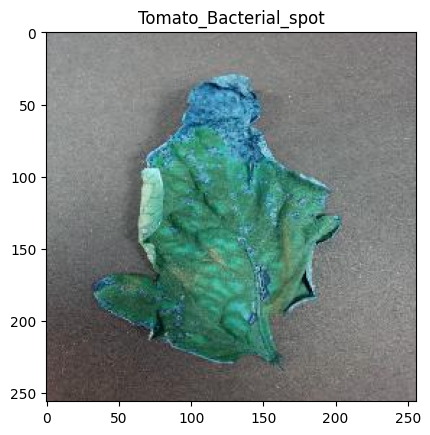

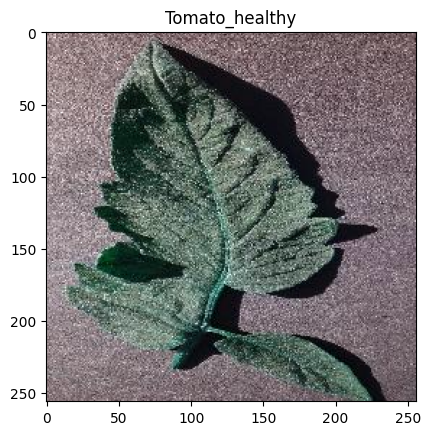

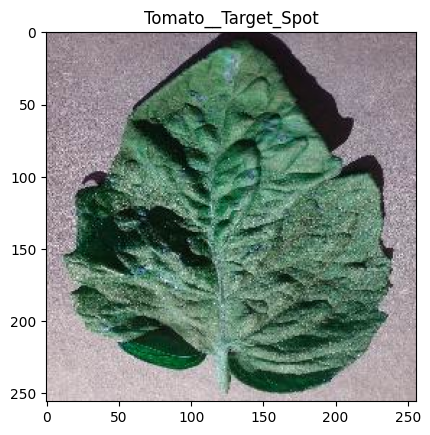

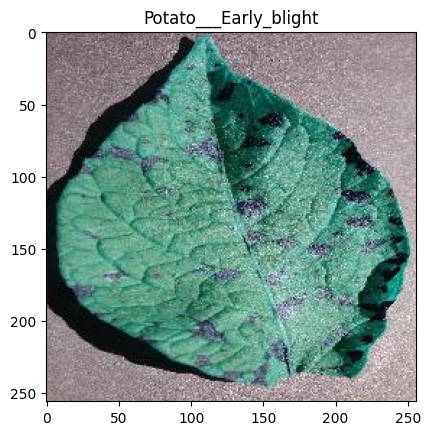

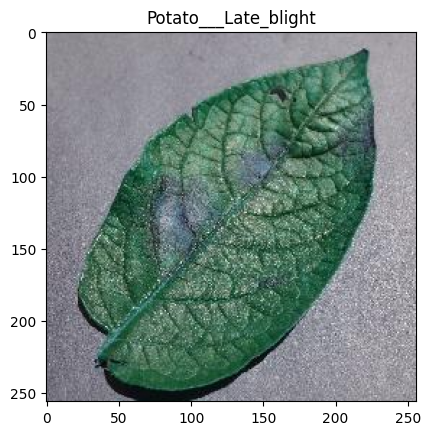

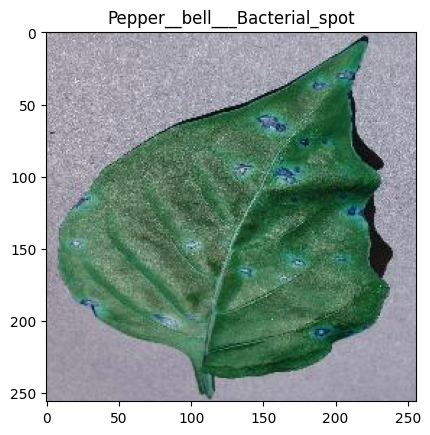

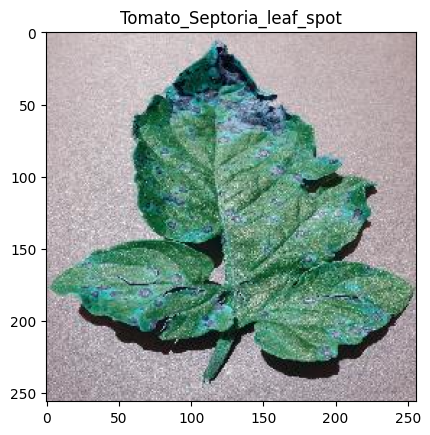

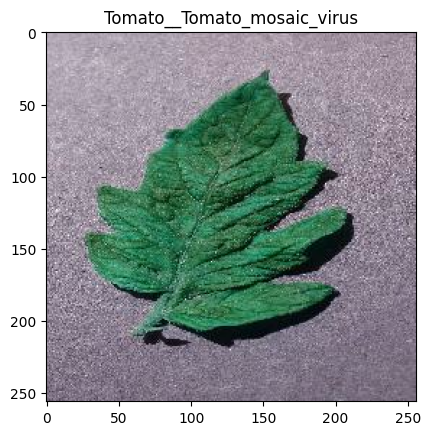

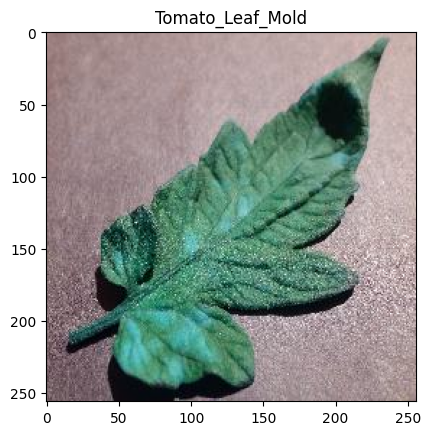

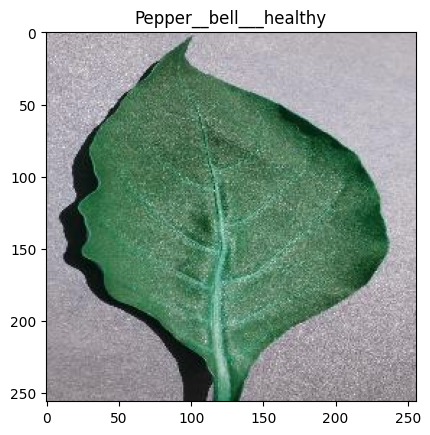

In [7]:
for plant in os.listdir(DATA_PATH):
    path = os.path.join(DATA_PATH, plant)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
        plt.imshow(image)
        plt.title(f'{plant}')
        plt.show()
        break

In [8]:
IMG_SHAPE = (256,256)
INP_SHAPE = [256,256,3]
EPOCHS = 10
BATCH_SIZE = 32

In [9]:
img_data_gen = ImageDataGenerator(rescale = 1./255, rotation_range=0.2, horizontal_flip=True, shear_range=0.2, validation_split=0.25)
train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BATCH_SIZE, subset='training', class_mode='categorical', shuffle=True)
val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BATCH_SIZE, subset='validation', class_mode='categorical', shuffle=True)

Found 15482 images belonging to 15 classes.
Found 5156 images belonging to 15 classes.


In [10]:
# getting indices
label = train_data_gen.class_indices
label

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

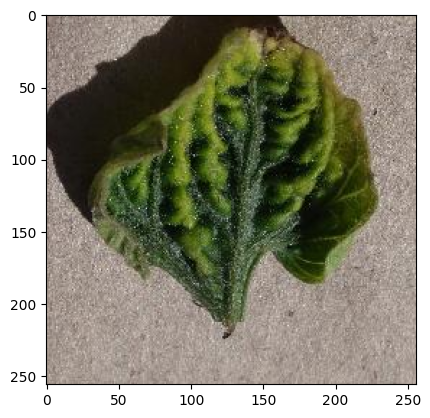

In [11]:
img = train_data_gen.__getitem__(11)[0]
plt.imshow(img[0]);

In [24]:
def modelbuild(model_name, INPUT_SHAPE=(256,256,3)):
  print("Model initialization started")
  base_model = model_name(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
  for layers in base_model.layers:
    layers.trainable = False
    print('Model creation started')
    inp_model = base_model.output

    x = GlobalAveragePooling2D()(inp_model)
    x = Dense(512, activation = 'relu')(x)
    x = Dense(15, activation = 'sigmoid')(x)

    model = Model(inputs = base_model.input, outputs = x)
    print('Model Summary')
    model.summary()

    model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
    history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=EPOCHS,
                      validation_steps=len(val_data_gen)//BATCH_SIZE,
                       steps_per_epoch=len(train_data_gen)//BATCH_SIZE,
                       batch_size=BATCH_SIZE)
    !mkdir -p saved_model
    model.save(f'saved_model/{model_name}_1.h5')
    print('Model was saved')

    return history

In [25]:
def evaluation_plot(model):
    sns.set_style('whitegrid')

    plt.figure(figsize=(10, 8))
    plt.plot(model['loss'], label = 'loss')
    plt.plot(model['accuracy'], label = 'accuracy')
    plt.plot(model['val_loss'], label = 'val_loss')
    plt.plot(model['val_accuracy'], label = 'val_accuracy')
    plt.legend()
    plt.title('Model Evaluation')
    plt.show()

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

In [26]:
vgg16_hist = modelbuild(VGG16)

Model initialization started
Model creation started
Model Summary


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 14,985,039 (57.16 MB)

 Trainable params: 14,985,039 (57.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 960ms/step - accuracy: 0.1279 - loss: 4.6314 - val_accuracy: 0.1625 - val_loss: 2.5580
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 868ms/step - accuracy: 0.1675 - loss: 2.5612 - val_accuracy: 0.1375 - val_loss: 2.5762
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 767ms/step - accuracy: 0.1519 - loss: 2.5488 - val_accuracy: 0.0688 - val_loss: 3.8160
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step - accuracy: 0.1499 - loss: 2.8541 - val_accuracy: 0.1500 - val_loss: 2.5572
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.1393 - loss: 2.5409 - val_accuracy: 0.1688 - val_loss: 2.5662
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 795ms/step - accuracy: 0.1582 - loss: 2.5229 - val_accuracy: 0.2188 - val_loss: 2.4026
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 805ms/step - accuracy: 0.1528 - loss: 2.5991 - val_accuracy: 0.1813 - val_loss: 2.3889
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 836ms/step - accuracy: 0.1531 - loss: 2.4782 - val_accurac

Model was saved


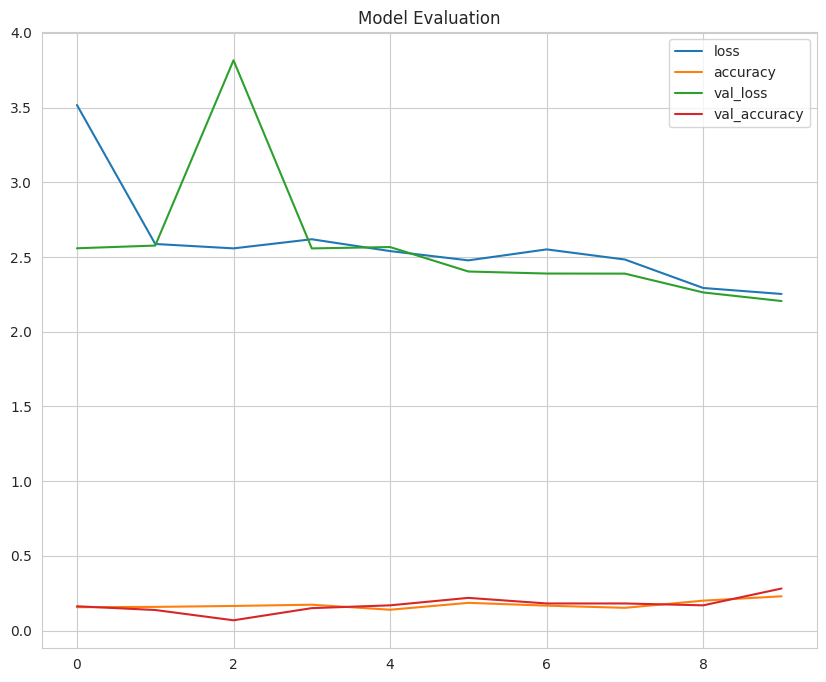

In [27]:
evaluation_plot(vgg16_hist.history)

In [28]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [29]:
inc_history = modelbuild(InceptionV3)

Model initialization started
Model creation started
Model Summary


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 127, 127, 32)   │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 127, 127, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 127, 127, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 125, 125, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 125, 125, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 125, 125, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 125, 125, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 125, 125, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 62, 62, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 62, 62, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 62, 62, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 22,859,567 (87.20 MB)

 Trainable params: 22,825,135 (87.07 MB)

 Non-trainable params: 34,432 (134.50 KB)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3724 - loss: 2.1455 - val_accuracy: 0.1500 - val_loss: 6.8269
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 720ms/step - accuracy: 0.6777 - loss: 1.2158 - val_accuracy: 0.0688 - val_loss: 11.4866
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 741ms/step - accuracy: 0.6755 - loss: 0.9812 - val_accuracy: 0.1437 - val_loss: 8.0686
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 640ms/step - accuracy: 0.7476 - loss: 0.8293 - val_accuracy: 0.1250 - val_loss: 12.1453
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 727ms/step - accuracy: 0.7643 - loss: 0.7089 - val_accuracy: 0.0812 - val_loss: 23.2947
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 721ms/step - accuracy: 0.8036 - loss: 0.6646 - val_accuracy: 0.4625 - val_loss: 2.5600
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.8090 - loss: 0.6003 - val_accuracy: 0.2313 - val_loss: 5.1193
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 706ms/step - accuracy: 0.7722 - loss: 0.7705 - val_accuracy

Model was saved


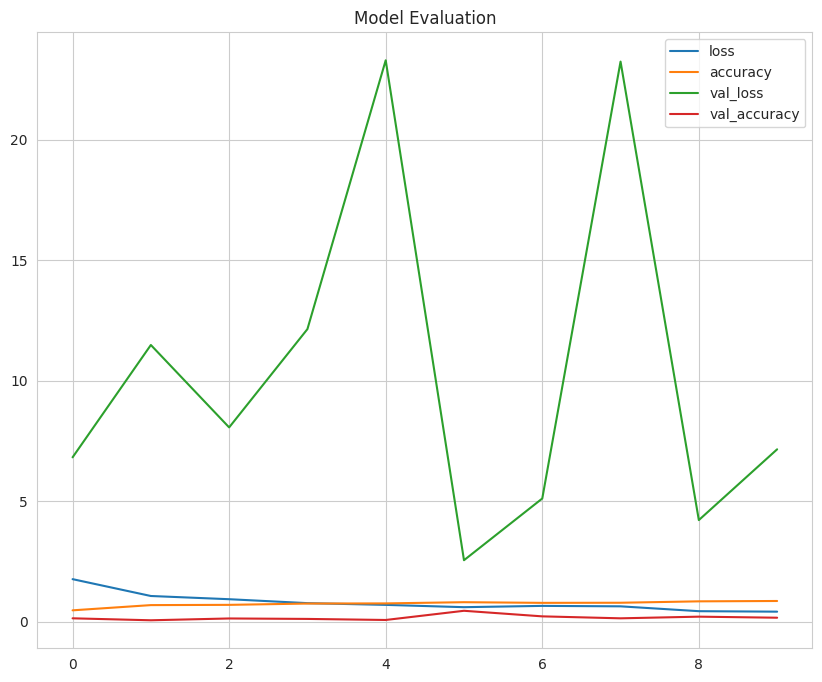

In [30]:
evaluation_plot(inc_history.history)